<h1> Predicting visitor type based on time spent on product-related and informational pages</h1>
<br>
<h2>Introduction</h2>
E-commerce has become increasingly popular and analyzing visitors' data has become one of the best strategies to improve one’s website interface and/or online marketing strategies to increase the amount of customers.  The dataset that we’ll be working with (Online Shoppers Purchasing Intention Dataset) contains information that can be helpful in such circumstances. 
<br><br>
<h2>Research question</h2> Is there a difference between visitor types based on the number of visits to product-related and informational pages? 
<br><br>
<i> Dataset:</i> <br>
Online Shoppers Purchasing Intention Dataset 
<br>
Source: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset
<br> 18 variables in total
<br>Length: 12,330
<br>
<br>
10 numerical variables:<br>
* Administrative, Informational, Product-related: the number of different types of pages visited <br>
* Administrative Duration, Informational Duration, Product Related Duration: the total time spent on different types of pages <br>
* Bounce Rates: percentage of visitors who enter the site from that page and then leave without triggering any other requests <br>
* Exit Rates: for all pageviews to the page, the percentage that were the last in the session <br>
* Page Value: the average value (measured by Google Analytics) for a web page that a user visited before completing an e-commerce transaction <br>
* Special Day: the closeness of the site visiting time to a specific special day <br>


<br> 
8 categorical variables: <br>
* Visitor Type: represents whether the user is a returning visitor or new visitor <br>
* Month <br>
* Operating Systems <br>
* Browser <br>
* Region  <br>
* Traffic Type <br>
* Weekend: True if yes, False if not <br>
* Revenue: True if purchase made, False if not <br>




<h2>Preliminary exploratory data analysis</h2>

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
install.packages("GGally")
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

<h3> Tidy data</h3>

In [2]:
shoppers_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv") 
shoppers_data 
glimpse(shoppers_data) #view of full dataset

shoppers_selected <- shoppers_data %>% 
    filter(VisitorType != "Other") %>% #In the original dataset, there was a third type for VisitorType called "Other". This was removed as our goal is to focus on New Visitors and Returning Visitors.
    select(Informational_Duration, ProductRelated_Duration, VisitorType) %>%
    mutate(VisitorType = as_factor(VisitorType))
shoppers_selected

Parsed with column specification:
cols(
  Administrative = col_double(),
  Administrative_Duration = col_double(),
  Informational = col_double(),
  Informational_Duration = col_double(),
  ProductRelated = col_double(),
  ProductRelated_Duration = col_double(),
  BounceRates = col_double(),
  ExitRates = col_double(),
  PageValues = col_double(),
  SpecialDay = col_double(),
  Month = col_character(),
  OperatingSystems = col_double(),
  Browser = col_double(),
  Region = col_double(),
  TrafficType = col_double(),
  VisitorType = col_character(),
  Weekend = col_logical(),
  Revenue = col_logical()
)



Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64,0.0,0.1,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,0,0,0,1,0,0.2,0.2,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,0,0,0,6,184.25,0.08333333,0.08666667,0,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
4,75,0,0,15,346.00,0.00000000,0.02105263,0,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
0,0,0,0,3,21.25,0.00000000,0.06666667,0,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


Rows: 12,330
Columns: 18
$ Administrative          <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ Administrative_Duration <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Informational           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Informational_Duration  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ ProductRelated          <dbl> 1, 2, 1, 2, 10, 19, 1, 0, 2, 3, 3, 16, 7, 6, …
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, 0.000000, 2.666667, 627.…
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.0500…
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.1400…
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8, …
$ Month                   <chr> "Feb", "Feb", "Feb", "Feb", "Feb", "Feb", "Fe…
$ OperatingSystems        <dbl> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, …
$ Browser                 <

Informational_Duration,ProductRelated_Duration,VisitorType
<dbl>,<dbl>,<fct>
0,0,Returning_Visitor
0,64,Returning_Visitor
0,0,Returning_Visitor
⋮,⋮,⋮
0,184.25,Returning_Visitor
0,346.00,Returning_Visitor
0,21.25,New_Visitor


<h2>Exploratory data analysis</h2> 

<h3> Training data </h3>
<br>
The following tables include our training set, the counts for the VisitorType classifier and the mean duration of each VisitorType on product-related pages and informational pages.

In [3]:
shoppers_split <- initial_split(shoppers_selected, prop = 0.75, strata = VisitorType)
shoppers_train <- training(shoppers_split)   
shoppers_test <- testing(shoppers_split)
shoppers_train 


Informational_Duration,ProductRelated_Duration,VisitorType
<dbl>,<dbl>,<fct>
0,0,Returning_Visitor
0,64,Returning_Visitor
0,0,Returning_Visitor
⋮,⋮,⋮
0,465.75,Returning_Visitor
0,184.25,Returning_Visitor
0,21.25,New_Visitor


<h3> Total number of rows</h3>

In [4]:
number_of_rows <- nrow(shoppers_train)
number_of_rows
sum(is.na(shoppers_train)) #no missing data

[1] 9185

[1] 0

<h3> Counts for VisitorType </h3>

In [5]:
counts_visitors <- shoppers_train %>% 
    group_by(VisitorType) %>% 
    summarize(n = n())
    counts_visitors



`summarise()` ungrouping output (override with `.groups` argument)



VisitorType,n
<fct>,<int>
Returning_Visitor,7914
New_Visitor,1271


<h3> Mean product-related duration and mean informational duration for each VisitorType

In [6]:
shoppers_means = group_by(shoppers_train, VisitorType) %>%
        summarize(mean_pr_dur = mean(ProductRelated_Duration, na.rm = TRUE), 
                 mean_info_dur = mean(Informational_Duration, na.rm = TRUE))
shoppers_means

`summarise()` ungrouping output (override with `.groups` argument)



VisitorType,mean_pr_dur,mean_info_dur
<fct>,<dbl>,<dbl>
Returning_Visitor,1282.6176,36.72495
New_Visitor,636.3501,20.42360


The following scatterplot demonstrates the distribution of product related duration vs. informational duration and visitor type.

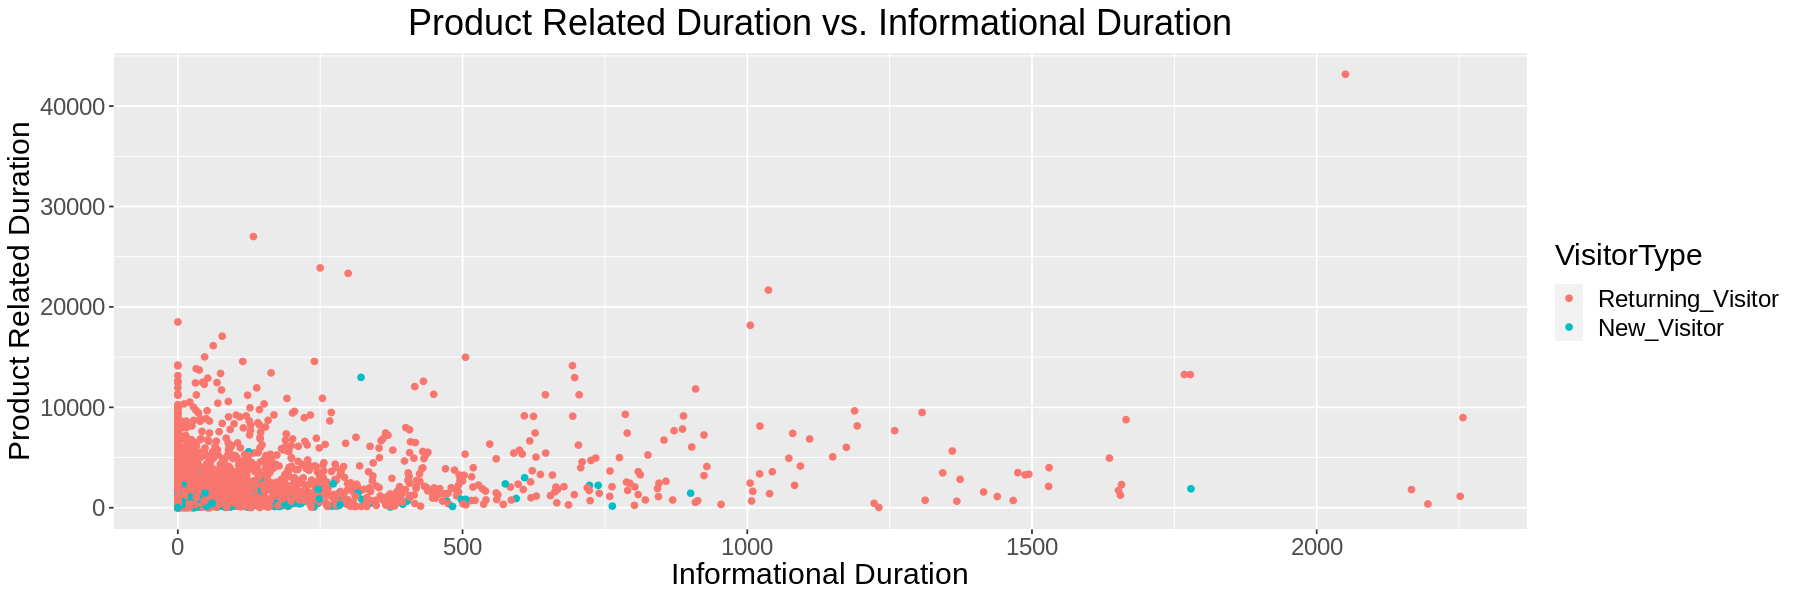

In [7]:
association_graph <- shoppers_train %>% 
    ggplot(aes(x = Informational_Duration, y = ProductRelated_Duration, color = VisitorType)) +
      geom_point(stat = "identity") + 
     xlab("Informational Duration") +
     ylab("Product Related Duration") +
     labs(fill = "Visitor Type", title = "Product Related Duration vs. Informational Duration") +
     theme(text = element_text(size = 18)) +
     theme(plot.title = element_text(hjust = 0.5))
options(repr.plot.width = 15, repr.plot.height = 5) 
association_graph


The following bar graphs show the relationship between visitor type and the mean value of informational and product related durations. The graph on the left compares visitor types to informational duration and the graph on the right compares visitor type to product related durations. It is evident that a significant portion of the visitors in our data set are returning visitors; this might result in an unbalanced training set.


Warning message:
“package ‘cowplot’ was built under R version 4.0.3”


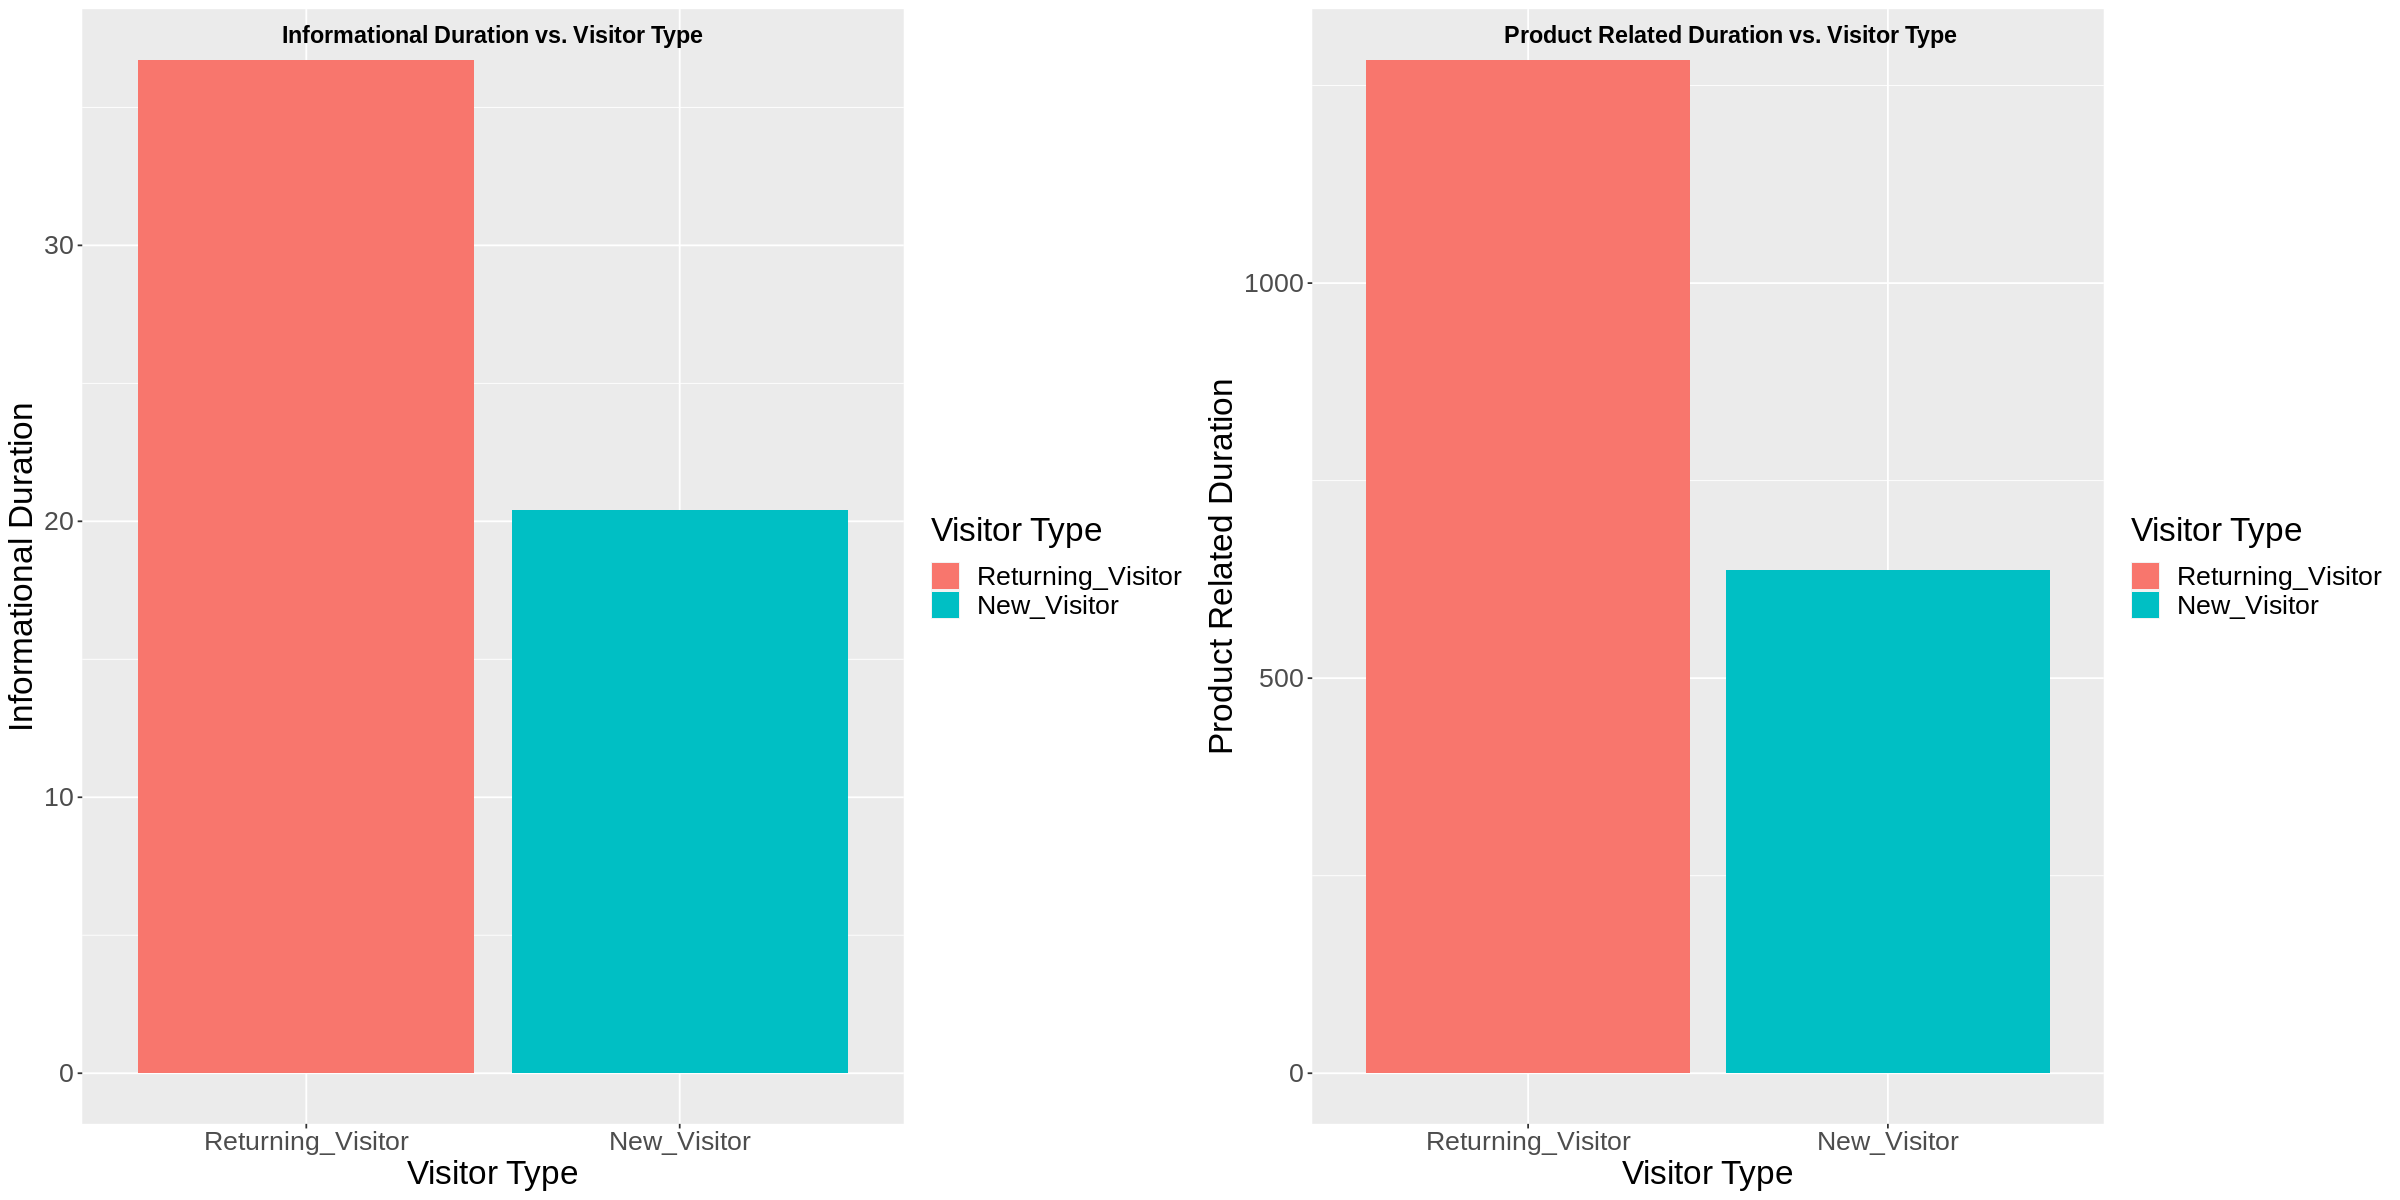

In [8]:

options(repr.plot.width = 20, repr.plot.height = 10)

shoppers_ID_plot = shoppers_means %>%
        ggplot(aes(x = VisitorType, y = mean_info_dur, fill = VisitorType)) +
        geom_bar(stat = "identity") +
        labs(x = "Visitor Type", y = "Informational Duration", fill = "Visitor Type") +
        theme(text = element_text(size = 20))

shoppers_PRD_plot = shoppers_means %>%
        ggplot(aes(x = VisitorType, y = mean_pr_dur, fill = VisitorType)) +
        geom_bar(stat = "identity") +
        labs(x = "Visitor Type", y = "Product Related Duration", fill = "Visitor Type") +
        theme(text = element_text(size = 20))

library(cowplot)
plot_grid(shoppers_ID_plot, shoppers_PRD_plot, nrow = 1, 
          labels = c('Informational Duration vs. Visitor Type', 'Product Related Duration vs. Visitor Type'),
          vjust = 2.5,
          hjust = -0.67)




<h2> Methods </h2>


We will be using classification and utilizing these variables to predict VisitorType: ProductRelated_Duration and Informational_Duration. As demonstrated by the graph below, we learned that one of the largest correlations for VisitorType is between Informational_Duration and ProductRelated_Duration. While there is an even larger correlation between Informational count and ProductRelated_Duration, they’re measured in different units; thus, we decided to stick with the variables that are measured the same. 
Furthermore, although at first we included the SpecialDay variable as part of our analysis, we decided to remove it as there doesn't appear to be a relationship between SpecialDay and VisitorType. <br>

<h3> Correlation matrix </h3>

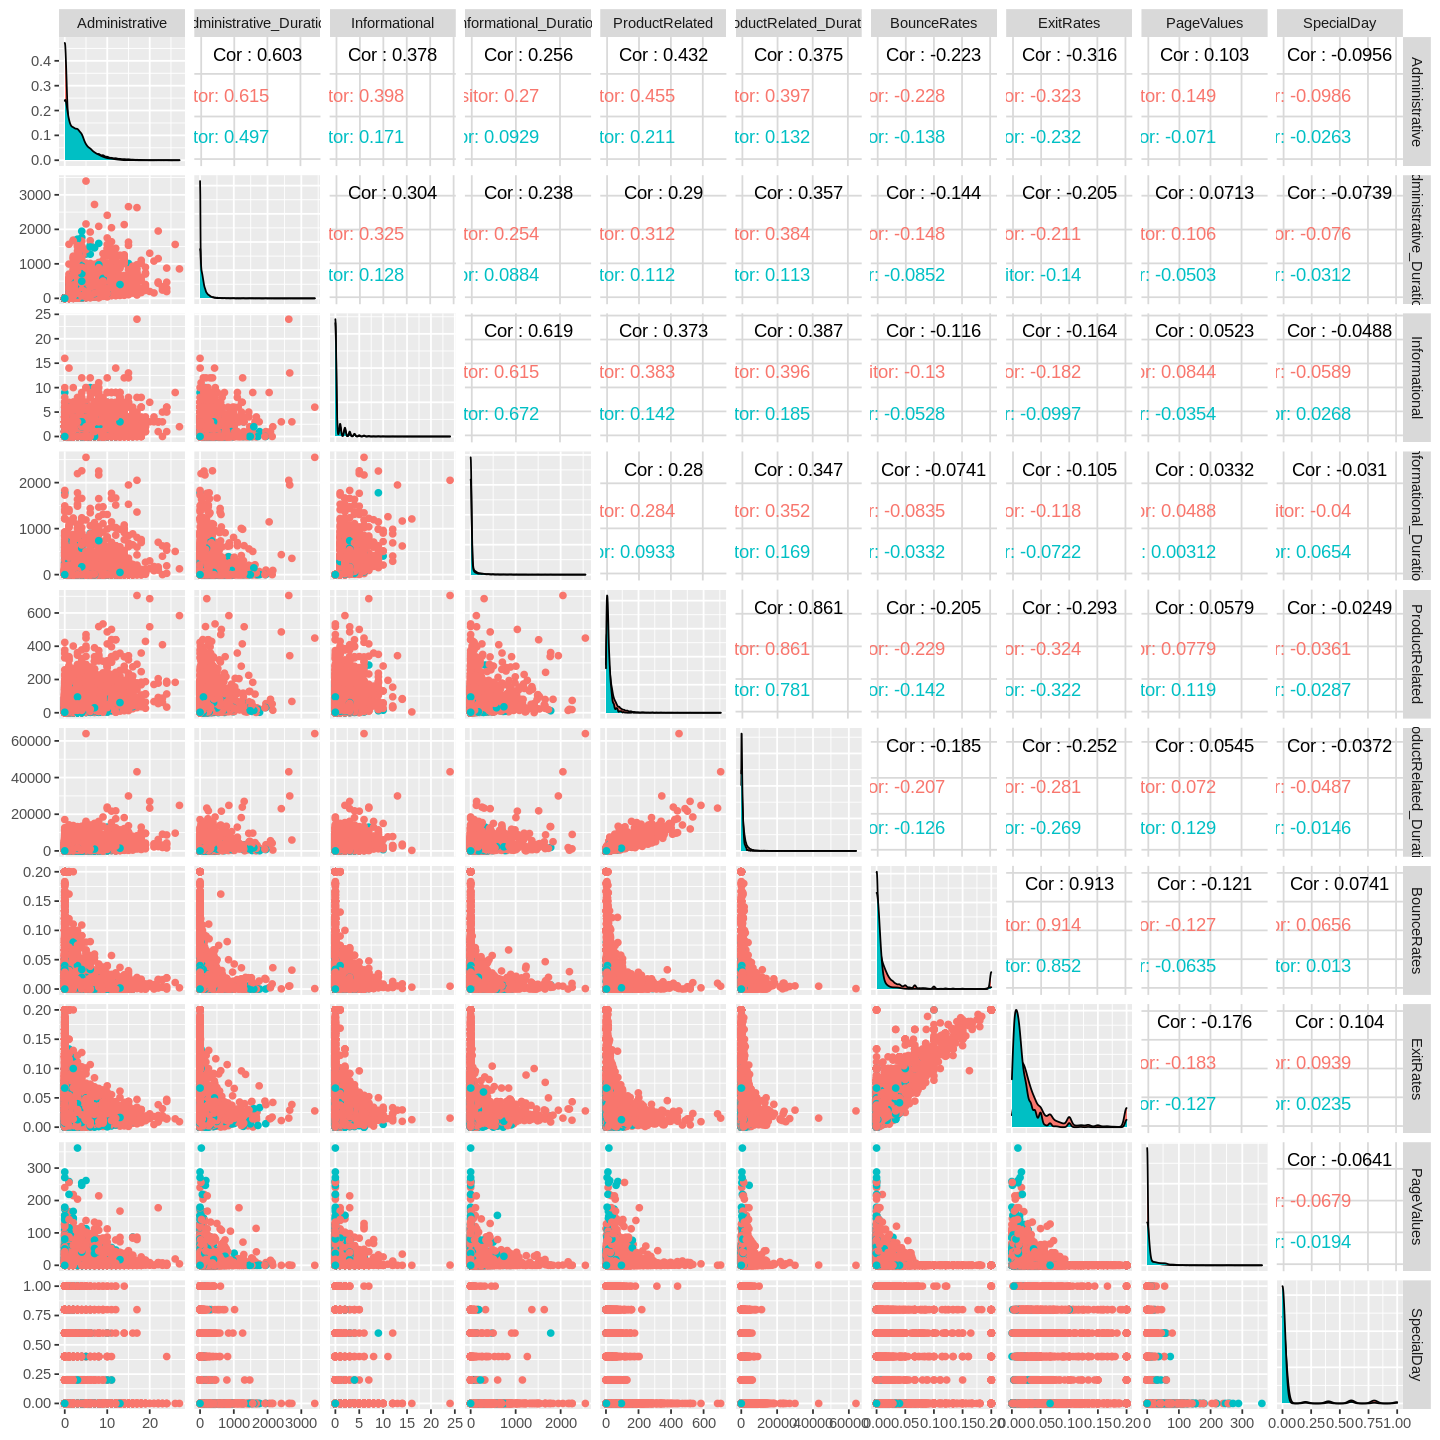

In [9]:
shoppers_tidy <- shoppers_data %>% 
    filter(VisitorType != "Other") %>%
    mutate(VisitorType = as_factor(VisitorType))

tidy_data_cor <- ggpairs(shoppers_tidy, columns = 1:10, ggplot2::aes(colour=VisitorType)) #correlation matrix between all predictors and VisitorType
options(repr.plot.width = 12, repr.plot.height = 12)
tidy_data_cor


<h3>Correlation matrix with our selected predictors</h3>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



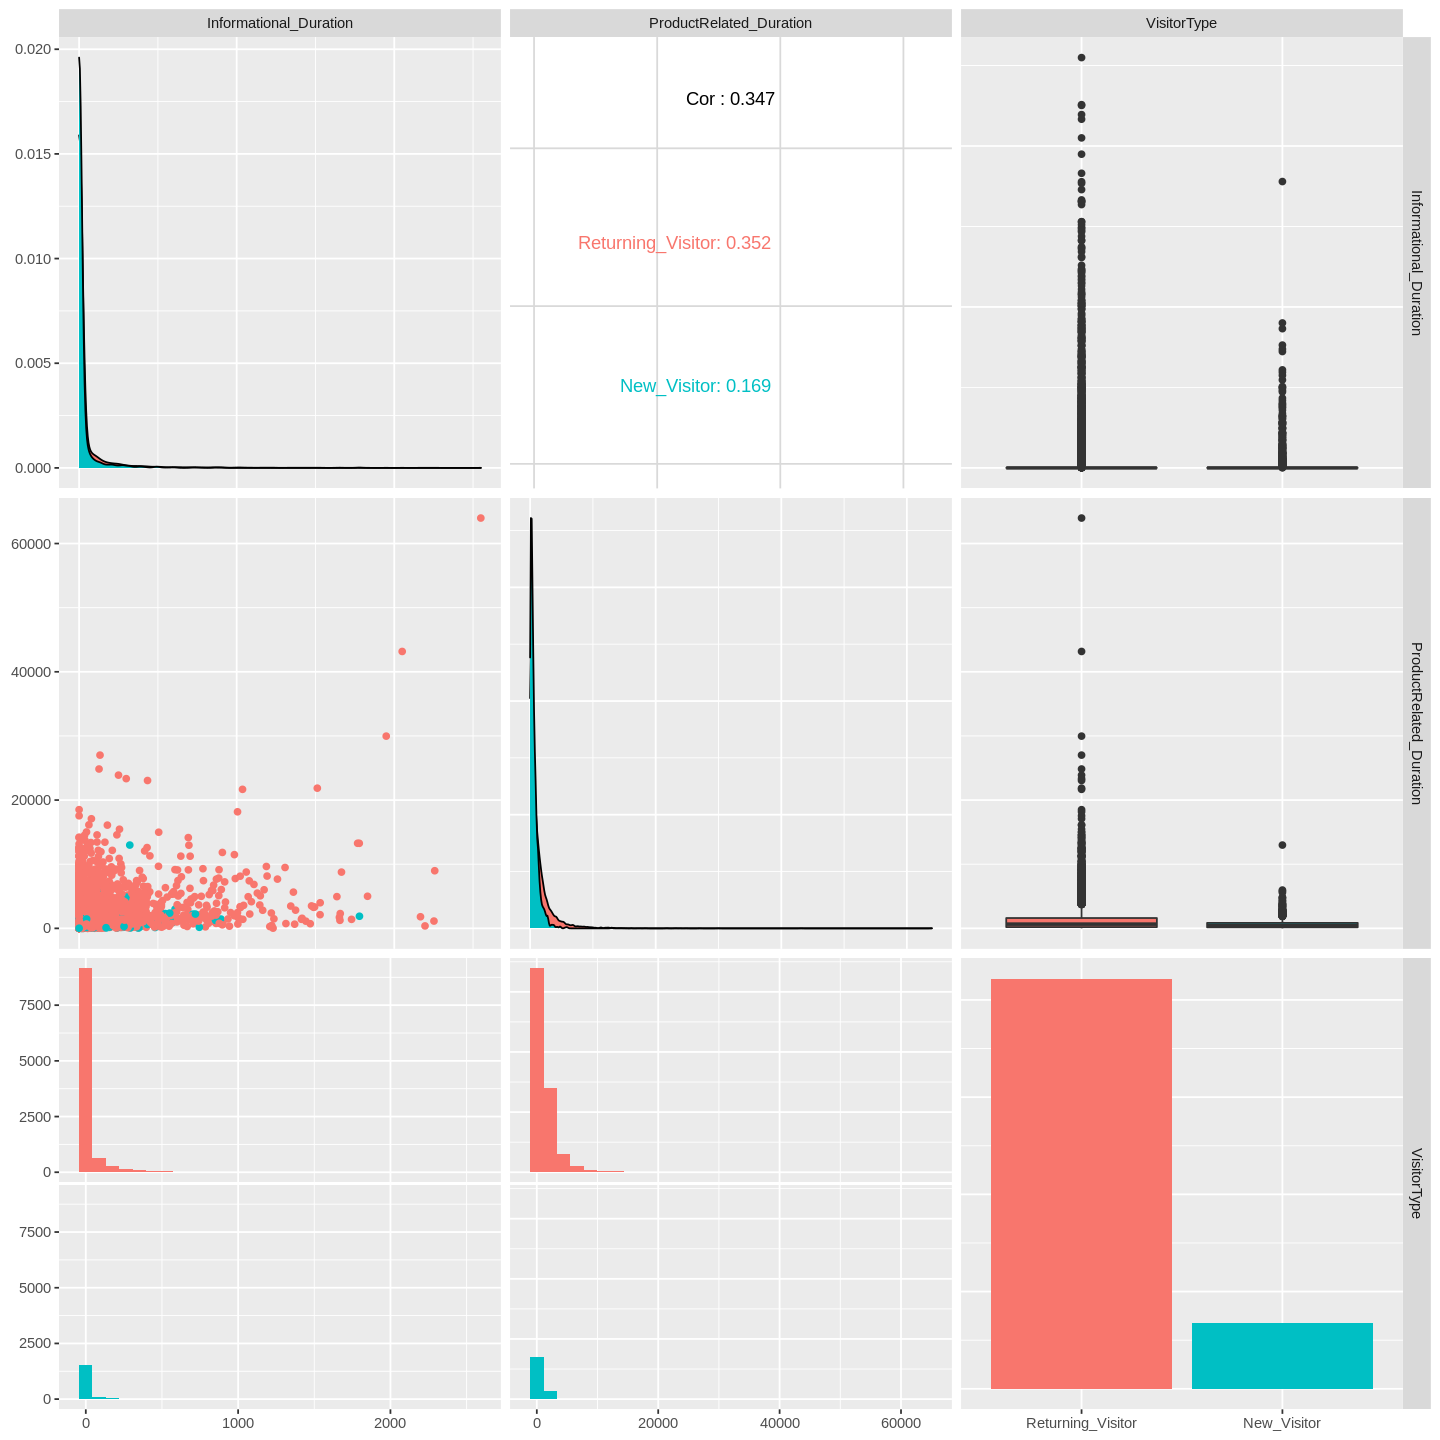

In [10]:
shoppers_tidy <- shoppers_data %>% 
    filter(VisitorType != "Other") %>%
    select(Informational_Duration, ProductRelated_Duration, VisitorType) %>% 
    mutate(VisitorType = as_factor(VisitorType))

tidy_data_cor <- ggpairs(shoppers_tidy, ggplot2::aes(colour=VisitorType))
options(repr.plot.width = 12, repr.plot.height = 12)
tidy_data_cor

<h3> Visualization</h3> 
To illustrate our results, we will be using a coloured bar graph/scatter plot that will depict the relationship between product-related duration (ProductRelated_Duration) and informational duration (Informational_Duration) with the visitor type (VisitorType) distinguished by colour and shape.

<h2> Expected outcomes</h2>

We expect to find that new visitors will spend more time on informational pages and returning visitors will spend more time on product-related pages.

<h2> Significance</h2>


These findings could help business strategists develop more targeted marketing strategies. For example, if we determine that new visitors do spend more time on informational pages, marketers could include incentives for them to create an account and/or offer exclusive deals for generating more revenue.

Future research could pertain to how we could more effectively display content on websites to attract more users.
* How does text-heavy vs. image-heavy informational pages impact a user’s purchasing behaviour and the amount of time they spend on the page? 
* How could time spent on informational pages be reduced to increase time spent on product-related pages? 
